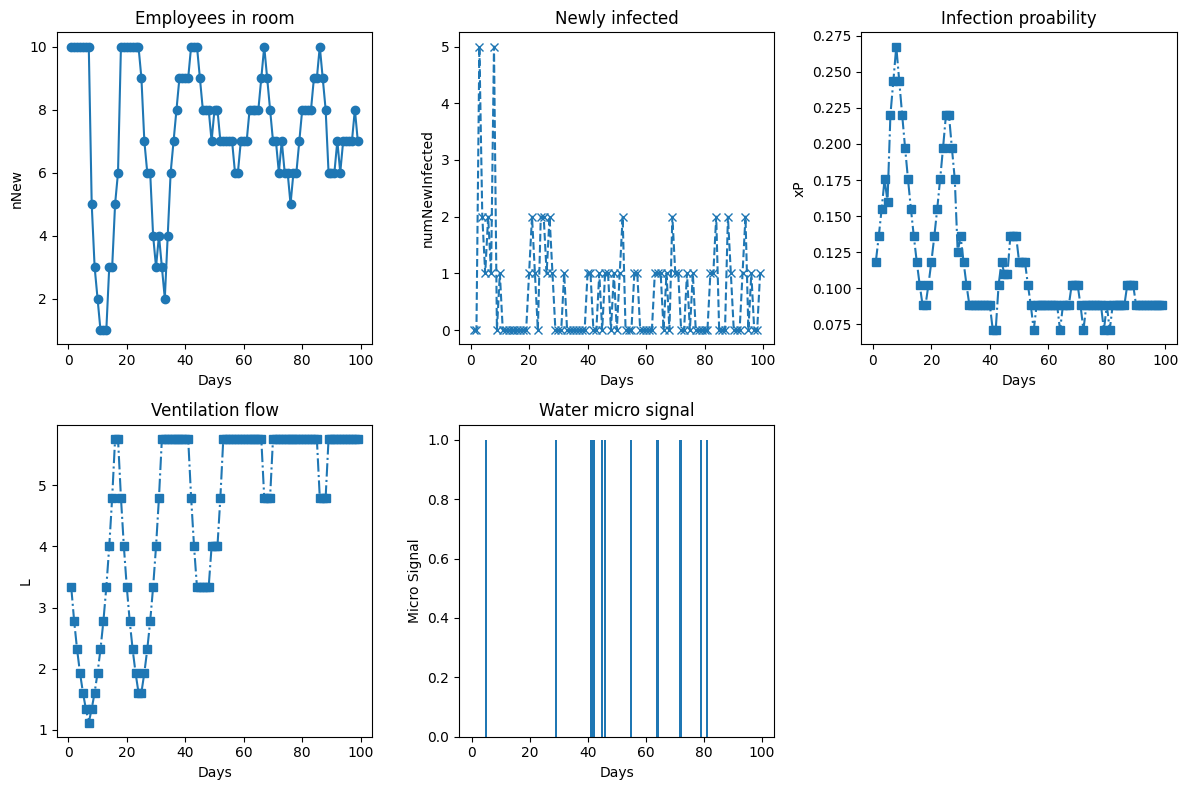

[[1.00000000e+00 1.00000000e+01 0.00000000e+00 1.18244479e-01
  3.33333333e+00 0.00000000e+00 0.00000000e+00]
 [2.00000000e+00 1.00000000e+01 0.00000000e+00 1.35816230e-01
  2.77777778e+00 0.00000000e+00 0.00000000e+00]
 [3.00000000e+00 1.00000000e+01 5.00000000e+00 1.54996623e-01
  2.31481481e+00 0.00000000e+00 0.00000000e+00]
 [4.00000000e+00 1.00000000e+01 2.00000000e+00 1.75648514e-01
  1.92901235e+00 0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 1.00000000e+01 1.00000000e+00 1.59936925e-01
  1.60751029e+00 1.00000000e+00 0.00000000e+00]
 [6.00000000e+00 1.00000000e+01 2.00000000e+00 2.20437574e-01
  1.33959191e+00 0.00000000e+00 0.00000000e+00]
 [7.00000000e+00 1.00000000e+01 1.00000000e+00 2.43937375e-01
  1.11632659e+00 0.00000000e+00 0.00000000e+00]
 [8.00000000e+00 5.00000000e+00 5.00000000e+00 2.67664829e-01
  1.33959191e+00 0.00000000e+00 0.00000000e+00]
 [9.00000000e+00 3.00000000e+00 0.00000000e+00 2.43937375e-01
  1.60751029e+00 0.00000000e+00 0.00000000e+00]
 [1.000000

In [72]:
import math
import numpy
import matplotlib.pyplot as plt
import random
maxDays=100
traceH=["Day","N","NI","xP","L","microS","reduceContact"]

trace=[]
trace.append(traceH)

baseParam={"InactivationRate":0.63,
"DepositionToSurfaces":0.24,
"AdditionalControlMeasures":0}

N=10
N0=10
NI=1
recoveryLag=10
illLag=5
microSP=0.1

A=25
h=3
L=4
QER=9
BR=0.76
OT=8

MaskEffic=0


def infectionProbability(A,h,L,QER,BR,OT,NI):
    iP=0
    
    lambdaV=L*A*3.6/(A*h)
    lambdaT=lambdaV+sum(baseParam.values())+0/(A*h)
    xConc=(1-1/(lambdaT*OT)*(1-math.exp(-lambdaT*OT)))
    avgConc=(1-0)*NI*QER/(lambdaT*h*A)*(1-1/(lambdaT*OT)*(1-math.exp(-lambdaT*OT)))
    
    QI=avgConc*OT*BR*(1-MaskEffic)
    iP=1-math.exp(-QI)
    
    return iP

trace.append([1,N,0,0,L,0,0])
for i in range(1,maxDays):

    N=trace[i][1]
    cOT=OT
    microS=0
    x=random.random()
    if x<microSP:
        microS=1
        cOT=OT*0.8
    
    xP=infectionProbability(A,h,L,QER,BR,cOT,NI)
    
    numNewInfected=0
    for j in range(1,N-NI):
        x=random.random()
        if x<xP:
            numNewInfected+=1

    nNew=min(N0,N+trace[max(1,i-recoveryLag)][2]-trace[max(1,i-illLag)][2])
    if nNew<1:
        nNew=1
    
    trace[i][0]=i
    trace[i][1]=nNew
    trace[i][2]=numNewInfected
    trace[i][3]=xP
    trace.append([i+1,nNew,0,0,L,0,0])
    
    if nNew/N0<0.8:
        oldL=L
        L=L*1.2
        if L>6:
            L=oldL
    if nNew/N0>0.9:
        L=L/1.2
    trace[i][4]=L
    trace[i][5]=microS
    
traceArr=numpy.array(trace[1:maxDays],dtype="float")


# Extract the data for plotting
x_values = [row[0] for row in traceArr]
y_values1 = [row[1] for row in traceArr]
y_values2 = [row[2] for row in traceArr]
y_values3 = [row[3] for row in traceArr]
y_values4 = [row[4] for row in traceArr]
y_values5 = [row[5] for row in traceArr]

# Create a 2x2 matrix of plots
plt.figure(figsize=(12, 8))  # Optional: Set the figure size

# Plot 1
plt.subplot(2, 3, 1)
plt.plot(x_values, y_values1, marker='o', linestyle='-')
plt.title('Employees in room')
plt.xlabel('Days')
plt.ylabel('nNew')

# Plot 2
plt.subplot(2, 3, 2)
plt.plot(x_values, y_values2, marker='x', linestyle='--')
plt.title('Newly infected')
plt.xlabel('Days')
plt.ylabel('numNewInfected')

# Plot 3
plt.subplot(2, 3, 3)
plt.plot(x_values, y_values3, marker='s', linestyle='-.')
plt.title('Infection proability')
plt.xlabel('Days')
plt.ylabel('xP')

# Plot 3
plt.subplot(2, 3, 4)
plt.plot(x_values, y_values4, marker='s', linestyle='-.')
plt.title('Ventilation flow')
plt.xlabel('Days')
plt.ylabel('L')

plt.subplot(2, 3, 5)
plt.bar(x_values, y_values5 )
plt.title('Water micro signal')
plt.xlabel('Days')
plt.ylabel('Micro Signal')

#def
plt.tight_layout()  # Optional: Improve spacing between subplots

plt.show()

print(traceArr)
print(sum(traceArr[1:maxDays,0]))
